ax.axis("off") 

In [2]:
from ultralytics import YOLO
from ultralytics.data.converter import convert_segment_masks_to_yolo_seg
import os
from PIL import Image
import torch
import numpy as np
from matplotlib import pyplot as plt
import cv2

### Converting mask images to ultralytics yolo txt format

In [ ]:
convert_segment_masks_to_yolo_seg('data/masks', 'data_for_yolo', 1) 

### Converting images to grayscale

In [6]:
def images_to_grayscale(folder_path):
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        image = Image.open(image_path).convert('L')
        image.save(image_path)

images_to_grayscale('data_for_yolo\\test\\images')
images_to_grayscale('data_for_yolo\\train\\images')
images_to_grayscale('data_for_yolo\\val\\images')

### Training model

In [1]:
model = YOLO("yolov8n-seg.pt")
results = model.train(data="data.yaml", epochs=1, batch=8, imgsz=960)

NameError: name 'YOLO' is not defined

### Exporting model

In [3]:
model.export(format="torchscript")

Ultralytics YOLOv8.2.79  Python-3.11.9 torch-2.3.0+cu118 CPU (Intel Core(TM) i7-8700 3.20GHz)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs

PyTorch: starting from 'runs\segment\train28\weights\best.pt' with input shape (1, 3, 960, 960) BCHW and output shape(s) ((1, 37, 18900), (1, 32, 240, 240)) (22.8 MB)

TorchScript: starting export with torch 2.3.0+cu118...
TorchScript: export success  5.6s, saved as 'runs\segment\train28\weights\best.torchscript' (45.5 MB)

Export complete (9.0s)
Results saved to C:\git\darbas\pytorch label segmentation\runs\segment\train28\weights
Predict:         yolo predict task=segment model=runs\segment\train28\weights\best.torchscript imgsz=960  
Validate:        yolo val task=segment model=runs\segment\train28\weights\best.torchscript imgsz=960 data=data.yaml  
Visualize:       https://netron.app


'runs\\segment\\train28\\weights\\best.torchscript'

In [5]:
images = []
for image_name in os.listdir("images/"):
    images.append(Image.open(os.path.join("images/", image_name)))

In [211]:
model = YOLO("best.pt")
model.export(format="torchscript")

Ultralytics YOLOv8.2.81  Python-3.11.9 torch-2.3.0+cu118 CPU (Intel Core(TM) i7-8700 3.20GHz)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs

PyTorch: starting from 'best.pt' with input shape (1, 3, 960, 960) BCHW and output shape(s) ((1, 37, 18900), (1, 32, 240, 240)) (22.8 MB)

TorchScript: starting export with torch 2.3.0+cu118...
TorchScript: export success  5.0s, saved as 'best.torchscript' (45.5 MB)

Export complete (7.9s)
Results saved to C:\git\darbas\pytorch label segmentation
Predict:         yolo predict task=segment model=best.torchscript imgsz=960  
Validate:        yolo val task=segment model=best.torchscript imgsz=960 data=data.yaml  
Visualize:       https://netron.app


'best.torchscript'

In [172]:
model = YOLO("best.pt")
results = model(images)


0: 960x960 3 labels, 45.1ms
1: 960x960 1 label, 45.1ms
Speed: 9.0ms preprocess, 45.1ms inference, 1.0ms postprocess per image at shape (1, 3, 960, 960)


In [173]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'label'}
obb: None
orig_img: array([[[ 84,  84,  68],
        [ 84,  85,  69],
        [ 90,  90,  78],
        ...,
        [ 46,  41,  38],
        [ 44,  40,  35],
        [ 44,  40,  35]],

       [[ 91,  91,  75],
        [ 85,  85,  71],
        [ 85,  85,  73],
        ...,
        [ 43,  38,  35],
        [ 44,  40,  35],
        [ 48,  44,  39]],

       [[ 90,  89,  75],
        [ 96,  96,  82],
        [ 94,  94,  82],
        ...,
        [ 46,  43,  39],
        [ 47,  44,  40],
        [ 50,  47,  43]],

       ...,

       [[ 88, 111, 106],
        [ 88, 111, 106],
        [ 91, 113, 108],
        ...,
        [189, 189, 189],
        [192, 192, 192],
        [191, 191, 191]],

       [[ 85, 108, 103],
        [ 85, 108, 103],
        [ 89, 111, 106],
        ...,
        [189, 189, 189],
    

In [174]:
results[0].masks.data.shape

torch.Size([3, 960, 960])

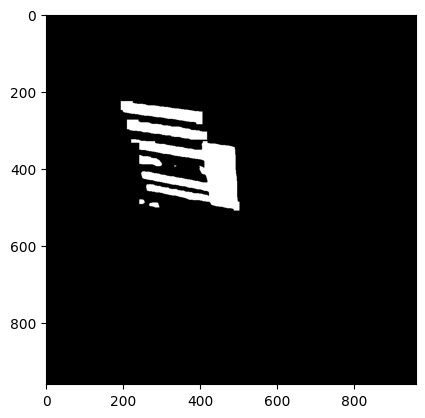

In [176]:
plt.imshow(np.where(np.sum(np.array(results[0].cpu().masks.data), axis=0) > 0, 1, 0), cmap="gray") 

In [3]:
model_torch = torch.jit.load("best.torchscript")
model_torch.eval()

RecursiveScriptModule(
  original_name=SegmentationModel
  (model): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(
      original_name=Conv
      (conv): RecursiveScriptModule(original_name=Conv2d)
      (act): RecursiveScriptModule(original_name=SiLU)
    )
    (1): RecursiveScriptModule(
      original_name=Conv
      (conv): RecursiveScriptModule(original_name=Conv2d)
      (act): RecursiveScriptModule(original_name=SiLU)
    )
    (2): RecursiveScriptModule(
      original_name=C2f
      (cv1): RecursiveScriptModule(
        original_name=Conv
        (conv): RecursiveScriptModule(original_name=Conv2d)
        (act): RecursiveScriptModule(original_name=SiLU)
      )
      (cv2): RecursiveScriptModule(
        original_name=Conv
        (conv): RecursiveScriptModule(original_name=Conv2d)
        (act): RecursiveScriptModule(original_name=SiLU)
      )
      (m): RecursiveScriptModule(
        original_name=ModuleList
        (0): RecursiveScriptM

In [6]:
images_np = []
for image in images:
    images_np.append(np.transpose(np.array(image.resize((960, 960))), (2, 0, 1)) / 255.0)
images_tensor = torch.tensor(images_np).float()

C:\Users\Opina\AppData\Local\Temp\ipykernel_15184\3396788587.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  images_tensor = torch.tensor(images_np).float()


In [7]:
results = model_torch.forward(images_tensor)

In [8]:
print(results[0].shape)
print(results[1].shape)

torch.Size([2, 37, 18900])
torch.Size([2, 32, 240, 240])


In [9]:
output_0 = results[0][0]
prototypes = results[1][0]
print("number of prototypes: ", prototypes.shape[0])
print("number of different classes: ", output_0.shape[0]-4-prototypes.shape[0])

number of prototypes:  32
number of different classes:  1


In [10]:
output_0.shape

torch.Size([37, 18900])

In [11]:
prototypes.shape

torch.Size([32, 240, 240])

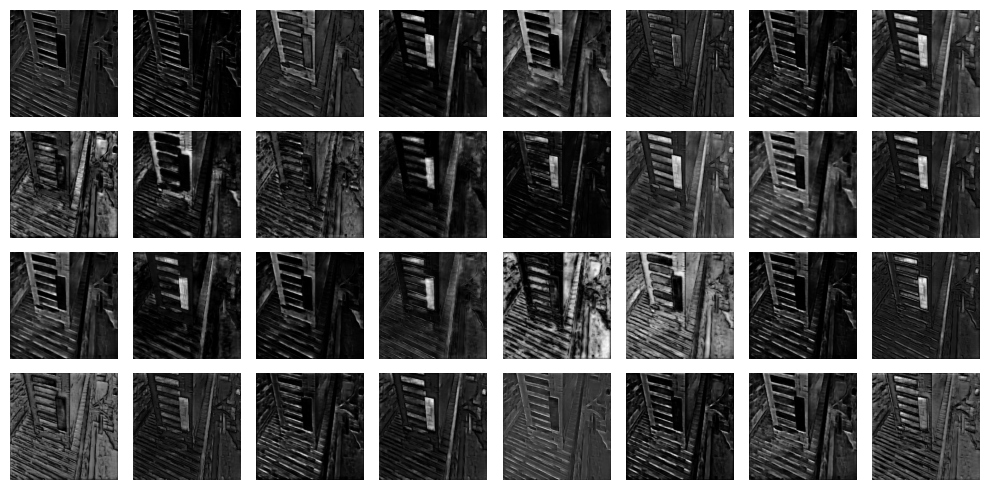

In [12]:
#####code to plot all prototypes 
# Define the number of rows and columns for the grid
num_images = len(prototypes)
num_cols = 8  # Change this according to your preference
num_rows = (num_images + num_cols - 1) // num_cols

# Plot the images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(prototypes[i], cmap='gray')
        ax.axis('off')
    else:
        ax.axis('off')  # Hide axes for empty subplots

plt.tight_layout()
plt.show()

In [26]:
def nms(bounding_boxes, threshold):
    # If no bounding boxes, return empty list
    if len(bounding_boxes) == 0:
        return []

    # Bounding boxes
    boxes = np.array(bounding_boxes)
    print(f"boxes shape: {boxes.shape}")
    # Extracting coordinates
    x_mid = boxes[:, 0]
    y_mid = boxes[:, 1]
    width = boxes[:, 2]
    height = boxes[:, 3]
    
    # Calculating start and end coordinates
    start_x = x_mid - width / 2
    start_y = y_mid - height / 2
    end_x = x_mid + width / 2
    end_y = y_mid + height / 2
    score = boxes[:, 4]

    # Picked bounding boxes
    picked_boxes = []
    picked_score = []

    # Compute areas of bounding boxes
    areas = (end_x - start_x + 1) * (end_y - start_y + 1)

    # Sort by confidence score of bounding boxes
    order = np.argsort(score)

    # Iterate bounding boxes
    while order.size > 0:
        # The index of largest confidence score
        index = order[-1]

        # Pick the bounding box with largest confidence score
        picked_boxes.append(bounding_boxes[index])

        # Compute ordinates of intersection-over-union(IOU)
        x1 = np.maximum(start_x[index], start_x[order[:-1]])
        x2 = np.minimum(end_x[index], end_x[order[:-1]])
        y1 = np.maximum(start_y[index], start_y[order[:-1]])
        y2 = np.minimum(end_y[index], end_y[order[:-1]])

        # Compute areas of intersection-over-union
        w = np.maximum(0.0, x2 - x1 + 1)
        h = np.maximum(0.0, y2 - y1 + 1)
        intersection = w * h

        # Compute the ratio between intersection and union
        ratio = intersection / (areas[index] + areas[order[:-1]] - intersection)

        left = np.where(ratio < threshold)

        print("---")
        print(order)
        print()
        print(left)
        print("---")

        order = order[left]

    return np.array(picked_boxes)

nb_class = output_0.shape[0]-4-prototypes.shape[0] # extract total number of classes
l_class = [[] for k in range(nb_class)]
output_0_T = output_0.T # so it become shape (8400 116)
threshold_detection = 0.8 #threshold to filter irrelevent detection
theshold_iou = 0.5 #threshold for NMS algo
for detection in output_0_T:
    conf = detection[4:nb_class+4] #extract all class confidence values for one detecton
    max_conv = torch.max(conf) #maximum confidence value
    argmax_conv = torch.argmax(conf)#class of the maximum confidence value
    if max_conv > threshold_detection:
        l_class[argmax_conv].append(np.concatenate((detection[:4], np.array([max_conv]), detection[4+nb_class:])))

l_class_NMS = []  
for clas in l_class:
    l_class_NMS.append(nms(clas, theshold_iou))  

boxes shape: (13, 37)
[10  1  7 11  8  3 12  5  9  0  2  6  4]
(array([0, 2, 3, 4, 6, 8], dtype=int64),)
[10  7 11  8 12  9]
(array([], dtype=int64),)


In [22]:
len(l_class)

1

In [23]:
len(l_class[0])

13

In [24]:
l_class_NMS[0].shape

(2, 37)

In [25]:
l_class_NMS[0][:, :4]

array([[     299.86,      83.483,      211.62,      101.02],
       [     372.07,      373.13,       257.9,      313.82]], dtype=float32)

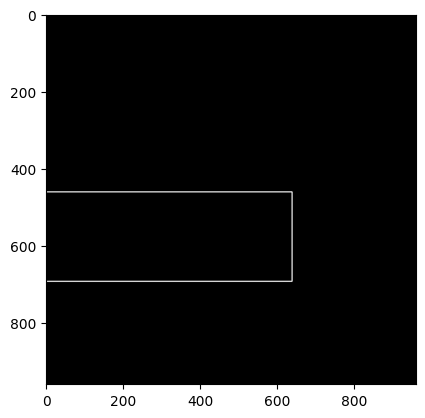

In [260]:
image = np.zeros((960, 960, 3), dtype=np.uint8)
# Draw each rectangle
for rect in l_class_NMS[0][:, :4]:
    x_center, y_center, width, height = rect
    
    # Calculate top-left and bottom-right points of the rectangle
    top_left = (int(x_center - width / 2), int(y_center - height / 2))
    bottom_right = (int(x_center + width / 2), int(y_center + height / 2))
    
    # Draw the rectangle on the image (color is white)
    image = cv2.rectangle(image, top_left, bottom_right, (255, 255, 255), 2)

plt.imshow(image)

IndexError: list index out of range

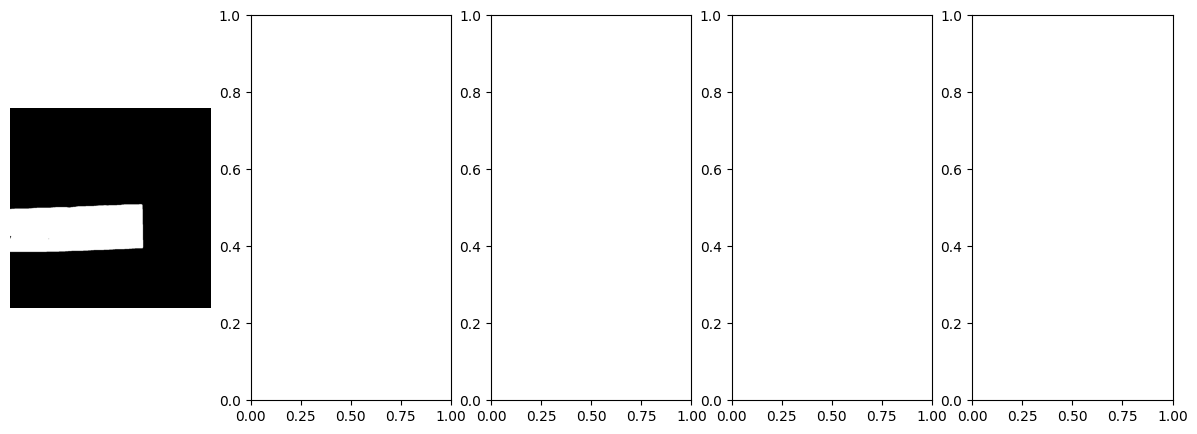

In [261]:
from skimage.transform import resize

def crop_image(image, box):
    x, y, w, h = box.astype(int)
    
    # Ensure box coordinates are within image boundaries
    x1 = max(0, x - w // 2)
    y1 = max(0, y - h // 2)
    x2 = min(image.shape[1], x + w // 2)
    y2 = min(image.shape[0], y + h // 2)
    
    # Create a mask to zero out areas outside the box
    mask = np.zeros_like(image, dtype=np.float32)
    mask[y1:y2, x1:x2] = 1
    
    # Apply the mask to the original image
    cropped_image = image * mask
    
    return cropped_image

def threshold_image(image,threshold=0.1):
    thresholded_image = np.where(image > threshold, 255,0)
    return thresholded_image


l_mask=[]
l_class=[]
l_conf=[]
for k in range(len(l_class_NMS)): #for all 80 classes
    for detection in l_class_NMS[k]: #for all detections for 1 class
        coeff = detection[5:] #extract coefficents
        mask = prototypes*coeff.reshape(prototypes.shape[0],1,1) #appy coefficients to the prototypes

        # Initialize an empty array to store resized images
        resized_mask = np.empty((mask.shape[0], 960, 960))
        
        # Resize each image in the array
        for i, image in enumerate(mask):
            resized_mask[i] = resize(image, (960, 960), anti_aliasing=True)
        l_mask.append(threshold_image(crop_image(np.mean(resized_mask, axis=0),detection[:4])))#final mask of the object
        l_class.append(k)#add the class index as
        l_conf.append(detection[4])#add the confidence value associated


#########show mask results
# Determine the number of subplots needed
num_plots = 5

# Calculate the number of rows and columns for the subplot grid
num_rows = 1  # Number of rows
num_cols = num_plots  # Number of columns

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Iterate over each subplot
for k, ax in enumerate(axes):
    ax.imshow(l_mask[k], cmap='gray')
    ax.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout
plt.show()

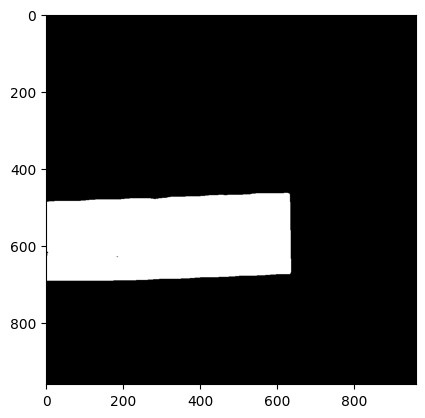

In [262]:
plt.imshow(np.where(np.sum(np.array(l_mask), axis=0) > 0, 1, 0), cmap="gray")